# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(f"The number of rows : {data.shape[0]}\n The number of columns : {data.shape[1]}.")
print(f"IS there any Nan values : {data.isna().values.any()}")
print(f"Are there any duplicated value : {data.duplicated().any()}")
for i in data.columns:
    print(type(i))
print(data.info())

The number of rows : 5391
 The number of columns : 6.
IS there any Nan values : False
Are there any duplicated value : False
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [7]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,1916-05-09,Intolerance,"$385,907",$0,$0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
# print(data["USD_Production_Budget"].mean())
# print(data["USD_Worldwide_Gross"].mean())
# print(data["USD_Domestic_Gross"].mean())
# print(data["USD_Worldwide_Gross"].min())
# print(data["USD_Domestic_Gross"].min())
# print(data.tail(int(data.shape[0] * 25/100)))
# print(data["USD_Production_Budget"].max())
highest_budget = data["USD_Production_Budget"].max()
print(highest_budget)
print(data[data["USD_Worldwide_Gross"] == highest_budget])

$99,000,000
Empty DataFrame
Columns: [Rank, Release_Date, Movie_Title, USD_Production_Budget, USD_Worldwide_Gross, USD_Domestic_Gross]
Index: []


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [9]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 0


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [10]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 0


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


### Filtering on Multiple Conditions

In [11]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
# print(international_releases)
world_wide_gross_revenue = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print(world_wide_gross_revenue)

Empty DataFrame
Columns: [Rank, Release_Date, Movie_Title, USD_Production_Budget, USD_Worldwide_Gross, USD_Domestic_Gross]
Index: []


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [12]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data_unclean = data[data.Release_Date >= scrape_date]
print(data_unclean)

      Rank Release_Date                     Movie_Title USD_Production_Budget  \
5384   321   2018-09-03               A Wrinkle in Time          $103,000,000   
5385   366   2018-10-08                  Amusement Park          $100,000,000   
5386  2950   2018-10-08                             Meg           $15,000,000   
5387   126   2018-12-18                         Aquaman          $160,000,000   
5388    96   2020-12-31                     Singularity          $175,000,000   
5389  1119   2020-12-31          Hannibal the Conqueror           $50,000,000   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The           $20,000,000   

     USD_Worldwide_Gross USD_Domestic_Gross  
5384                  $0                 $0  
5385                  $0                 $0  
5386                  $0                 $0  
5387                  $0                 $0  
5388                  $0                 $0  
5389                  $0                 $0  
5390                  $0     

In [13]:
data_clean = data.drop(data_unclean.index)
print(data_clean)

      Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

     USD_Production_Budget USD_Worldwide_Gross USD_Domestic_Gross  
0                 $110,000         $11,000,000        $10,000,000  
1                 $385,907                  $0                 $0  
2                 $200,000          $8,000,000         $8,000,0

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [14]:
film_lose_money = data.query("USD_Worldwide_Gross < USD_Production_Budget")
print(film_lose_money)
film_lose_money.shape[0]/data_clean.shape[0]

      Rank Release_Date                     Movie_Title USD_Production_Budget  \
0     5293   1915-08-02           The Birth of a Nation              $110,000   
1     5140   1916-05-09                     Intolerance              $385,907   
4     5222   1925-01-01                  The Big Parade              $245,000   
6     4630   1927-12-08                           Wings            $2,000,000   
8     4240   1930-01-01                   Hell's Angels            $4,000,000   
...    ...          ...                             ...                   ...   
5386  2950   2018-10-08                             Meg           $15,000,000   
5387   126   2018-12-18                         Aquaman          $160,000,000   
5388    96   2020-12-31                     Singularity          $175,000,000   
5389  1119   2020-12-31          Hannibal the Conqueror           $50,000,000   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The           $20,000,000   

     USD_Worldwide_Gross US

0.5083580980683506

# Seaborn for Data Viz: Bubble Charts

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 4), dpi=200)
sns.set_theme()
with sns.axes_style("darkgrid"):
       ax = sns.scatterplot(data=data_clean,
                     x='Release_Date', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',)

       ax.set(ylim=(0, 450000000),
              xlim=(data_clean["Release_date"].min(), data_clean["Release_date"].max()),
              xlabel='Date',
              ylabel='Budget in $100 millions')
plt.show()

KeyError: 'Release_date'

ValueError: Image size of 1561x225316 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x800 with 1 Axes>

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [82]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [87]:
old_films = data_clean[data_clean.Decade <= 1970]
new_films = data_clean[data_clean.Decade > 1970]
old_films.describe()
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
242,912,1978-12-15,Superman,55000000,300200000,134218018,1970
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
255,1521,1979-07-12,Star Trek: The Motion Picture,35000000,139000000,82258456,1970
260,1676,1979-12-14,1941,32000000,94875000,34175000,1970
256,1691,1979-08-15,Apocalypse Now,31500000,81250488,78800000,1970


# Seaborn Regression Plots

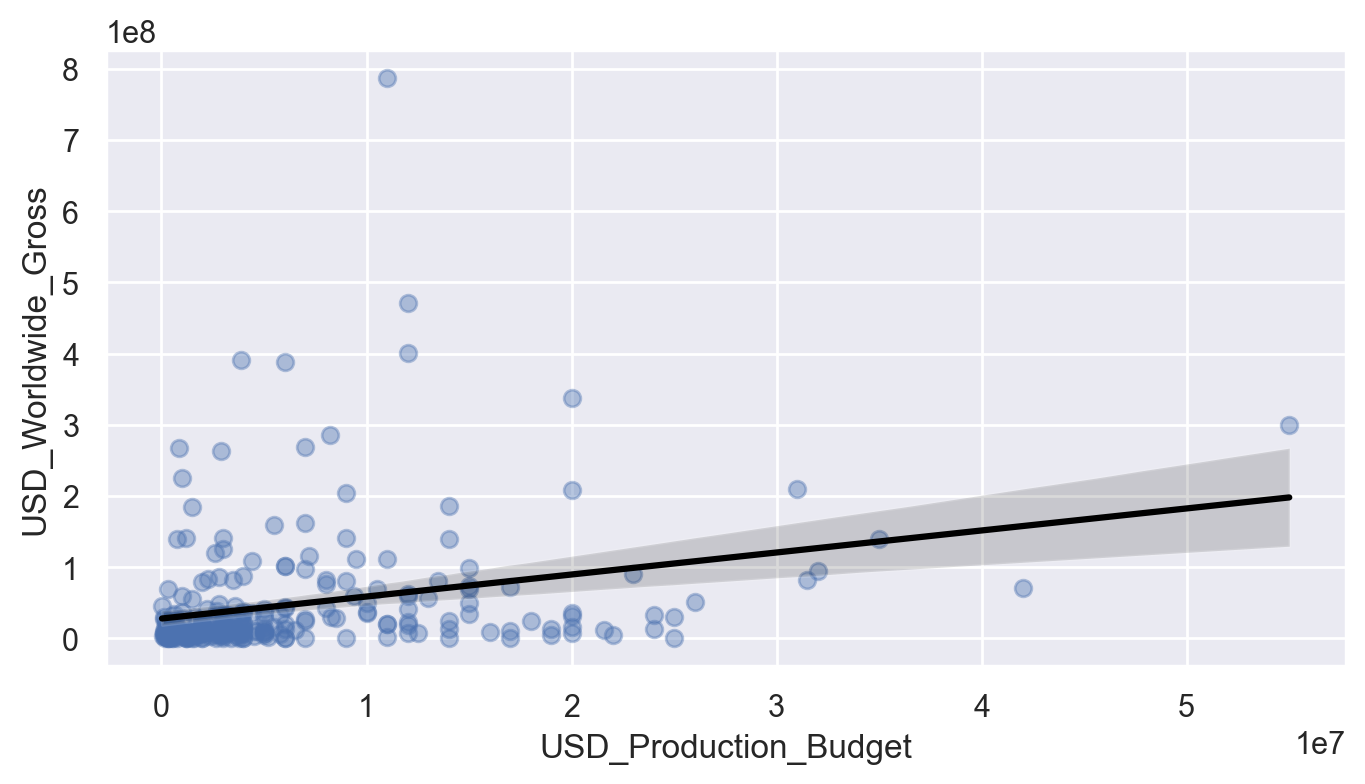

In [90]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

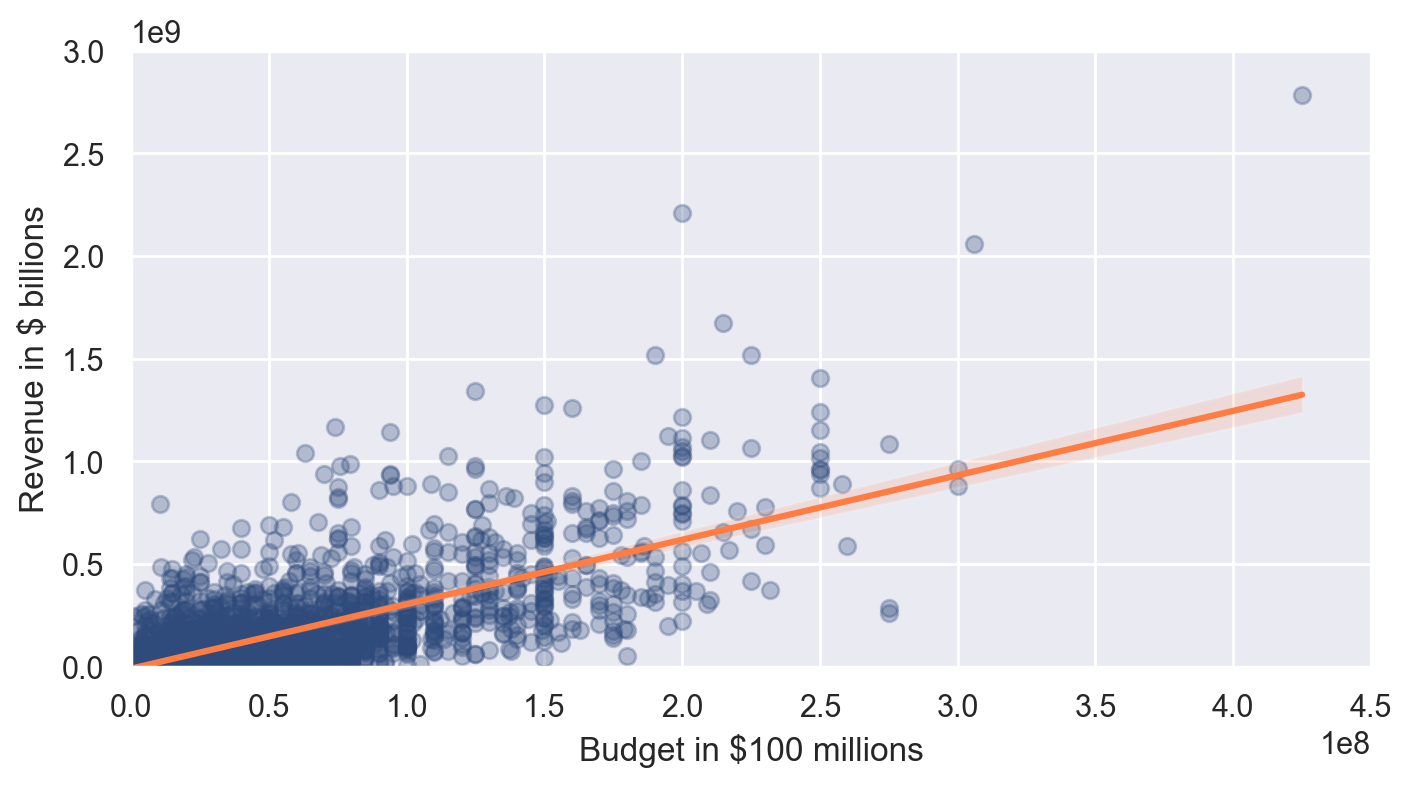

In [91]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [96]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
linearRegression.fit(X, y)
linearRegression.intercept_
linearRegression.coef_
linearRegression.score(X, y)

0.564250171393927

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [98]:
budget = 350000000
revenue_estimate = linearRegression.intercept_[0] + linearRegression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.088e+09.
